<a href="https://colab.research.google.com/github/Morningspread/MITACS1/blob/main/Sample_BCData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample Working Data Set

In [247]:
#importing Pandas, Numpy and Matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import sklearn 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from matplotlib import pyplot as plt
from sklearn import  metrics
#print("scikit-learn version: %s" %sklearn.__version__)
# We want to max out the display here
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Creating a working Data Set Proportional to the BC Data.


In [248]:
data= {  "age": ["early","middle","old"],
  "men_count": [505,1425,633],
  "women_count": [529,1355,553]}
df=pd.DataFrame(data)
df

,age,men_count,women_count
0,early,505,529
1,middle,1425,1355
2,old,633,553


A function to generate data frame of the given Male and Female count.

In [249]:
def datagenarator(age,malecount,feamlecount):
  Gender=np.repeat(("M","F"), (malecount,feamlecount))
  a=np.repeat(age,malecount+feamlecount)
  #p=np.repeat(province,malecount+feamlecount)
  df=pd.DataFrame(Gender,a)
  df.reset_index(inplace=True)
  df.columns = ["Age",'Gender',]
  #df['Gender'] = Gender
  return df

In [250]:
import random
rng = np.random.default_rng()
dfs=[]
for i, row in df.iterrows():
  #province=row['GEO_NAME']
  age=row['age']
  malecount=row['men_count']
  feamlecount=row['women_count']
  df=datagenarator( age, malecount, feamlecount)
  dfs.append(df)
master_df = pd.concat(dfs,axis=0,ignore_index=True)

In [251]:
df=master_df
print(df.tail())
df.shape

      Age Gender
4995  old      F
4996  old      F
4997  old      F
4998  old      F
4999  old      F


(5000, 2)

Generating Loneliness Score

In [252]:
def ds(df_row):
  if df_row['Age'] == 'early':
    if df_row['Gender']=='M':
      ds=np.random.exponential(scale=8.16, size=1)
      ds=ds[0]
      ds=round(ds,2)
    else:
      ds=np.random.exponential(scale=11.27, size=1)
      ds=ds[0]
      ds=round(ds,2)
  elif df_row['Age'] == 'middle':
    if df_row['Gender']=='M':
      ds=np.random.exponential(scale=8.71, size=1)
      ds=ds[0]
      ds=round(ds,2)
    else:
      ds=np.random.exponential(scale=8.72, size=1)
      ds=ds[0]
      ds=round(ds,2)
  else:
    if df_row['Gender']=='M':
      ds=np.random.exponential(scale=5.61, size=1)
      ds=ds[0]
      ds=round(ds,2)
    else:
      ds=np.random.exponential(scale=7, size=1)
      ds=ds[0]
      ds=round(ds,2)
  return ds

In [253]:
df["Loneliness score"] = df.apply(ds, axis=1)
import random
#df.loc[df['Depression score']<8] = 8 #round(random.uniform(8,10),2)
df.loc[df["Loneliness score"]>32] = 8.16 
df.tail()

,Age,Gender,Loneliness score
4995,old,F,6.33
4996,old,F,4.08
4997,old,F,13.81
4998,old,F,10.02
4999,old,F,2.21


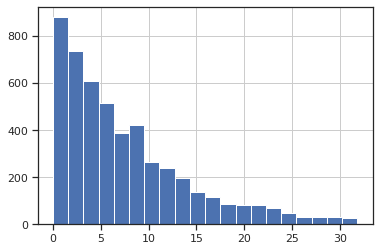

In [254]:
df["Loneliness score"].hist(bins=20)

In [255]:
x=df["Loneliness score"].values
x=x.tolist()
x=np.array(x)
x.ndim

1

In [256]:
x1 = x.reshape(1, 5000)
x1.ndim

2

Generating PHQ-9(corr=0.61 with Loneliness Score)

In [257]:
"""Example of generating correlated exponentially distributed random samples."""

import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid


# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 5000

# The desired covariance matrix.
r = np.array([
        [  1, 0.68],
        [ 0.68,  1],
    ])

# Generate samples from three independent exponentially distributed random
# variables (with mean 0 and std. dev. 1).
#x = norm.rvs(size=(3, num_samples))
#x1 = np.random.exponential(scale=8.16, size= (1,num_samples))
x2 = np.random.exponential(scale=8, size= (1, num_samples))
x  = np.concatenate((x1, x2), axis=0)

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

In [258]:
from numpy.lib.shape_base import column_stack
dfc=pd.DataFrame(y)
dfc=dfc.T
dfc.columns=['Loneliness Score','PHQ-9']
print(dfc.head())
print(dfc.shape)
dfc.corr()

   Loneliness Score      PHQ-9
0             13.01  10.579341
1              2.27   7.587087
2             11.25  11.449265
3             22.48  16.758134
4             21.94  17.106922
(5000, 2)


,Loneliness Score,PHQ-9
Loneliness Score,1.000000,0.623064
PHQ-9,0.623064,1.000000


,Loneliness Score,PHQ-9
0,13.01,10.58
1,2.27,7.59
2,11.25,11.45
3,22.48,16.76
4,21.94,17.11


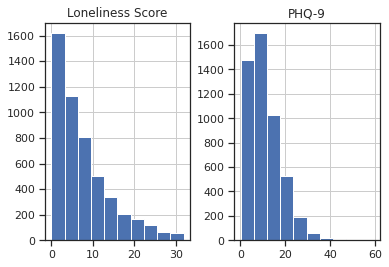

In [259]:
#dfc.loc[dfc['PHQ-9']>27] = 0 # instead of 0 -> stronger right tail
dfc['PHQ-9']=dfc['PHQ-9'].round(2)
dfc.hist()
dfc.head()

Text(0, 0.5, 'PHQ-9')

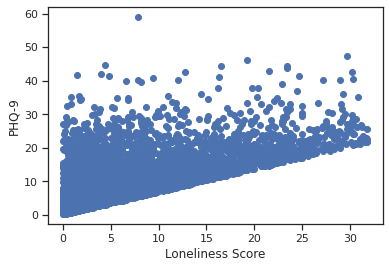

In [260]:
# Scatter plot of the PHQ-9 with the Loneliness Score
plt.scatter(dfc['Loneliness Score'],dfc['PHQ-9'])
plt.xlabel('Loneliness Score')
plt.ylabel('PHQ-9')

In [261]:
df=df.drop(["Loneliness score"], axis=1)
df=pd.concat([df,dfc], axis=1)
df

,Age,Gender,Loneliness Score,PHQ-9
0,early,M,13.01,10.58
1,early,M,2.27,7.59
2,early,M,11.25,11.45
3,early,M,22.48,16.76
4,early,M,21.94,17.11
...,...,...,...,...
4995,old,F,6.33,4.78
4996,old,F,4.08,4.11
4997,old,F,13.81,11.09
4998,old,F,10.02,7.39


In [262]:
df.head()

,Age,Gender,Loneliness Score,PHQ-9
0,early,M,13.01,10.58
1,early,M,2.27,7.59
2,early,M,11.25,11.45
3,early,M,22.48,16.76
4,early,M,21.94,17.11


Generating GAD-7(corr=0.50 with Loneliness Score)

In [263]:
"""Example of generating correlated exponentially distributed random samples."""

import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid


# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 5000

# The desired covariance matrix.
r = np.array([
        [  1, 0.65],
        [ 0.65,  1],
    ])

# Generate samples from three independent exponentially distributed random
# variables (with mean 0 and std. dev. 1).
#x = norm.rvs(size=(3, num_samples))
#x1 = np.random.exponential(scale=8.16, size= (1,num_samples))
x3 = np.random.exponential(scale=10, size= (1, num_samples))
x  = np.concatenate((x1, x3), axis=0)

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

In [264]:
from numpy.lib.shape_base import column_stack
dfd=pd.DataFrame(y)
dfd=dfd.T
dfd.columns=['Loneliness Score','GAD-7']
print(dfd.head())
print(dfd.shape)
print(dfd.corr())
dfd=round(dfd[['GAD-7']],2)
dfd.loc[dfd['GAD-7']>21] = 0 

   Loneliness Score      GAD-7
0             13.01  11.938465
1              2.27   3.114445
2             11.25  15.096677
3             22.48  37.624520
4             21.94  20.011672
(5000, 2)
                  Loneliness Score     GAD-7
Loneliness Score          1.000000  0.501468
GAD-7                     0.501468  1.000000


In [265]:
df=pd.concat([df,dfd], axis=1)
df

,Age,Gender,Loneliness Score,PHQ-9,GAD-7
0,early,M,13.01,10.58,11.94
1,early,M,2.27,7.59,3.11
2,early,M,11.25,11.45,15.10
3,early,M,22.48,16.76,0.00
4,early,M,21.94,17.11,20.01
...,...,...,...,...,...
4995,old,F,6.33,4.78,15.77
4996,old,F,4.08,4.11,3.40
4997,old,F,13.81,11.09,0.00
4998,old,F,10.02,7.39,10.29


The distribution of the generated data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4671f34b90>,
      dtype=object)

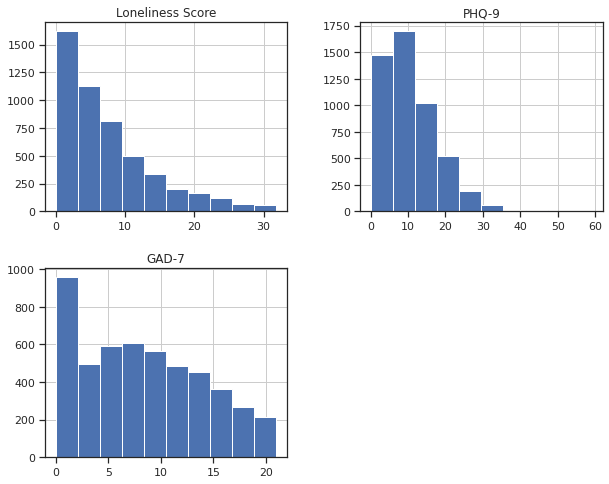

In [266]:
df.hist(figsize=[10,8])

Applying dummy coding on Gender


In [267]:
df=pd.get_dummies(df,columns=['Gender'])
df

,Age,Loneliness Score,PHQ-9,GAD-7,Gender_8.16,Gender_F,Gender_M
0,early,13.01,10.58,11.94,0,0,1
1,early,2.27,7.59,3.11,0,0,1
2,early,11.25,11.45,15.10,0,0,1
3,early,22.48,16.76,0.00,0,0,1
4,early,21.94,17.11,20.01,0,0,1
...,...,...,...,...,...,...,...
4995,old,6.33,4.78,15.77,0,1,0
4996,old,4.08,4.11,3.40,0,1,0
4997,old,13.81,11.09,0.00,0,1,0
4998,old,10.02,7.39,10.29,0,1,0


In [268]:
df.describe()

,Loneliness Score,PHQ-9,GAD-7,Gender_8.16,Gender_F,Gender_M
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.508504,10.817326,8.269890,0.023000,0.474200,0.502800
std,6.716692,7.217569,5.891393,0.149918,0.499384,0.500042
min,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000
25%,2.320000,5.360000,3.400000,0.000000,0.000000,0.000000
50%,5.585000,9.280000,7.900000,0.000000,0.000000,1.000000
75%,10.640000,14.852500,12.792500,0.000000,1.000000,1.000000
max,31.830000,59.070000,21.000000,1.000000,1.000000,1.000000


Linear Regression to predict PHQ-9

0.38837663226476005

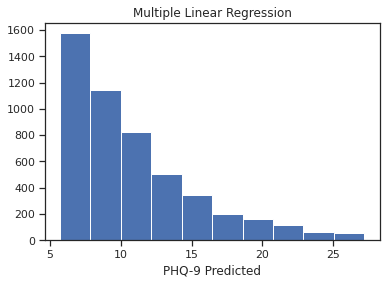

In [269]:
from sklearn import linear_model
from sklearn.metrics import r2_score
reg = linear_model.LinearRegression()
X=df[['Loneliness Score','Gender_F','Gender_M']]
y1=df['PHQ-9']
reg.fit(X,y1)
y1pred=reg.predict(X)
plt.hist(y1pred)
plt.xlabel("PHQ-9 Predicted")
plt.title("Multiple Linear Regression")
r2_score(y1, y1pred)



In [270]:
# regression coefficients
reg.coef_  

array([0.66879893, 0.29851723, 0.11710473])

In [271]:
# intercept
reg.intercept_

5.595209458046056

Linear regression to predict GAD-7

0.028260876038268656

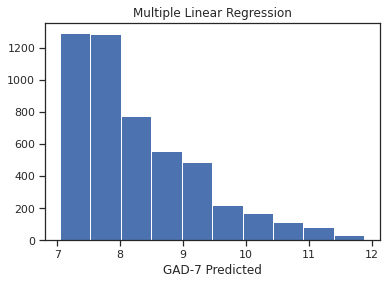

In [272]:
y2=df['GAD-7']
reg.fit(X,y2)
y2pred=reg.predict(X)
plt.hist(y2pred)
plt.xlabel("GAD-7 Predicted")
plt.title("Multiple Linear Regression")
r2_score(y2, y2pred)

In [273]:
#intercept
reg.intercept_

7.967660737286213

In [274]:
#regression coefficients
reg.coef_

array([ 0.14349852, -0.65106738, -0.92779202])